## Name - Priyanshu Dubey
## Student No. - 2374690
## Assignment no. - 2 - Clustrering
## Date - 01/03/2024

In [50]:
# Importing the important packages
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# TASK 2.1

## The Iris data set contains 150 Samples and 4 features. 
## Each sample represents an iris flower 
## and the four features are: Sepal length, Sepal width, Petal length and Petal width all in cm.

## The Iris_labels file contains the class labels for iris data.

In [145]:
# Loading the data to the codebase
iris_data = np.load('./Iris_data.npy')
labels = np.load('./Iris_labels.npy')
# print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [146]:
# Checking the shape of the data
print(np.shape(iris_data))
print(np.shape(labels))

(150, 4)
(150,)


[0 1 2]


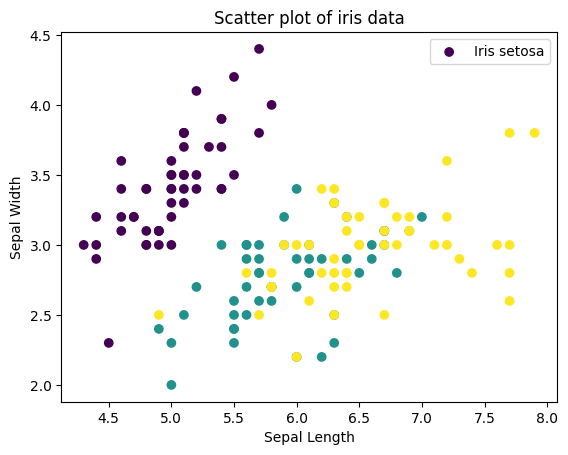

In [147]:
print(np.unique(labels))
features = iris_data[:, :2]
plt.scatter(features[:, 0], features[:, 1], c = labels)
plt.legend(labels=["Iris setosa", "Iris versicolor", "Iris virginica"])
plt.title("Scatter plot of iris data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# TASK 2.2

## Steps I followed in the below code:-
### 1. Used the pre loaded iris data value in the variable named iris_data
### 2. Defined the number of clusters as 3
### 3. created the KMeans object and fitted the iris_data to KMeans model
### 4. Then identified the cluster labels and centroids
### 5. Then finally plotted the graph

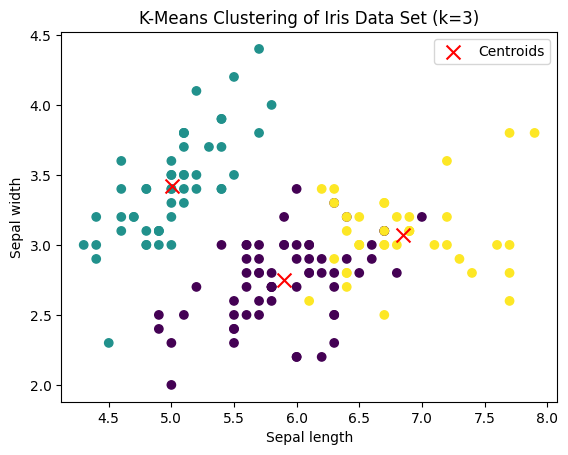

In [160]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(iris_data.data)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title(f"K-Means Clustering of Iris Data Set (k={k})")
plt.legend()
plt.show()

# TASK 2.3

## Steps followed in this task:-
### 1. Used pre-loaded Iris Data set in the variable iris_data
### 2. Selected the first two features to work on this task
### 3. Then created the GMM with 3 clusters and set the random_state to 0 so that it won't change on the go when we are running the code multiple times
### 4. Then trained the GMM on the selected features
### 5. Assiged each data points to seaprate seaprate clusters
### 6. Then calculated the means of the gaussian components
### 7. Then finally plotted the visualization
# --------------------------------------------------------
## And for the posterior probability part - 
### 1. Predicted the prosterior probability firts based on first two features
### 2. Then added for loop to iterate through each component(Selected the 3 componenets as n_componenets=3)
### 3. Then extracted data and probability - 
####   I.   Find the index of the maximum value respect to the axis i(i will iterate 3 times) and compare it with the component
####   II.  Then extract the data from the original feature based on the Ist point.
####   III. Then extracted the corresponding posterior probability for the component i.
### 4. Then added the scatter plot, colorbars, labels and titels

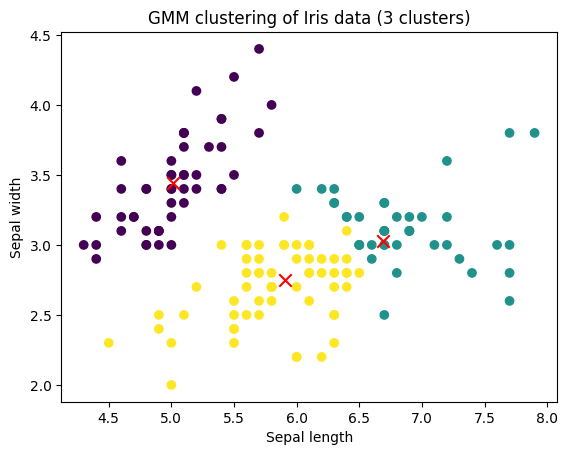

In [161]:
features = iris_data[:, :2]
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(features)
predicted_labels = gmm.predict(features)
means = gmm.means_
plt.scatter(features[:, 0], features[:, 1], c=predicted_labels)
plt.scatter(means[:, 0], means[:, 1], marker='x', s=80, c='red')

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("GMM clustering of Iris data (3 clusters)")
plt.show()

(150, 3)


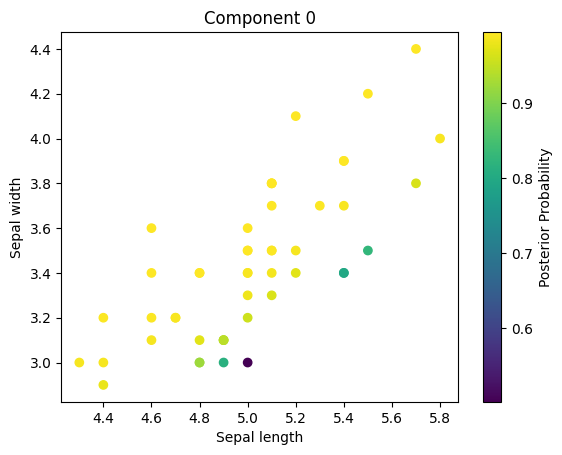

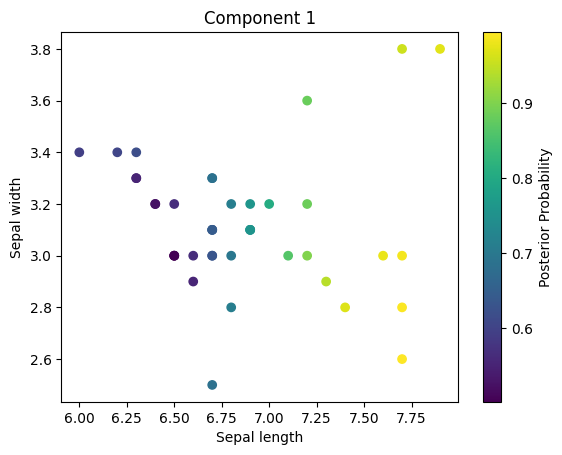

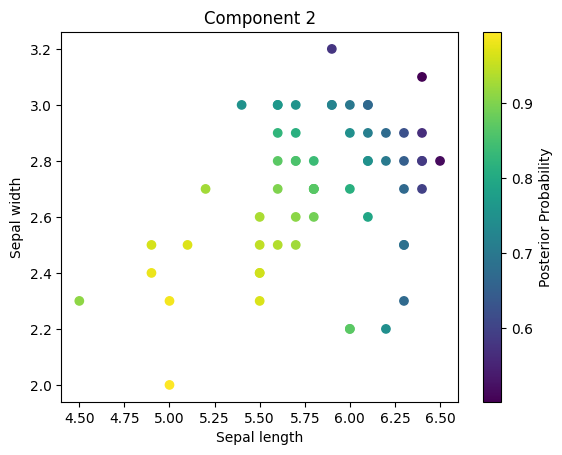

In [164]:
posterior_probs = gmm.predict_proba(features)

# print(posterior_probs)
for i in range(gmm.n_components):
    component_indices = np.argmax(posterior_probs, axis=1) == i
    component_data = features[component_indices]
    component_probs = posterior_probs[component_indices, i]
    
    plt.scatter(component_data[:, 0], component_data[:, 1], c=component_probs)
    plt.colorbar(sm, label='Posterior Probability', ax=plt.gca())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(f"Component {i}")
    plt.show()

# TASK 2.4

## Here in this Task 2.4, I loaded the task2_4.npy file using np.load to the task2 variable and then I plotted it using KMeans
## Then after I using elbow method to plot it anc check for number of clutsers and for that I used KElbowVisualizer.
## reference - https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

Shape:  (100, 10)


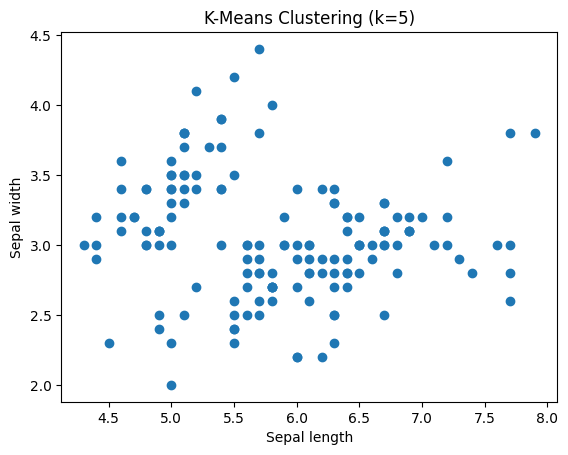

In [156]:
# task2 = np.load("./task2_4.npy")
# print("Shape: ", np.shape(task2))
# # print(task2)

# k = 5
# kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
# kmeans.fit(task2.data)
# cluster_labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
# plt.scatter(data_copy[:, 0], data_copy[:, 1])
# plt.xlabel("Sepal length")
# plt.ylabel("Sepal width")
# plt.title(f"K-Means Clustering (k={k})")
# plt.show()

[27630.63900237918, 1152.602204730304]


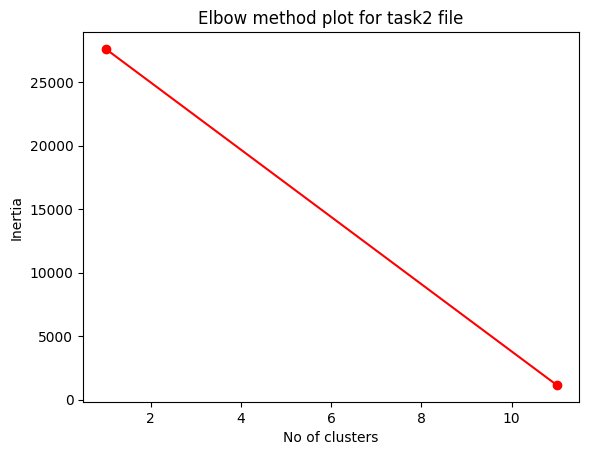

In [181]:
# cluster_range = (1,11)
# inertia_data = []

# for i in cluster_range:
#     kmeans = KMeans(n_clusters = i, random_state = 5, n_init = 10)
#     kmeans.fit(task2)
#     inertia = kmeans.inertia_
#     inertia_data.append(inertia)

# print(inertia_data)
# plt.plot(cluster_range, inertia_data, marker = "o", c = "red")
# plt.xlabel("No of clusters")
# plt.ylabel("Inertia")
# plt.title("Elbow method plot for task2 file")
# plt.show()
    

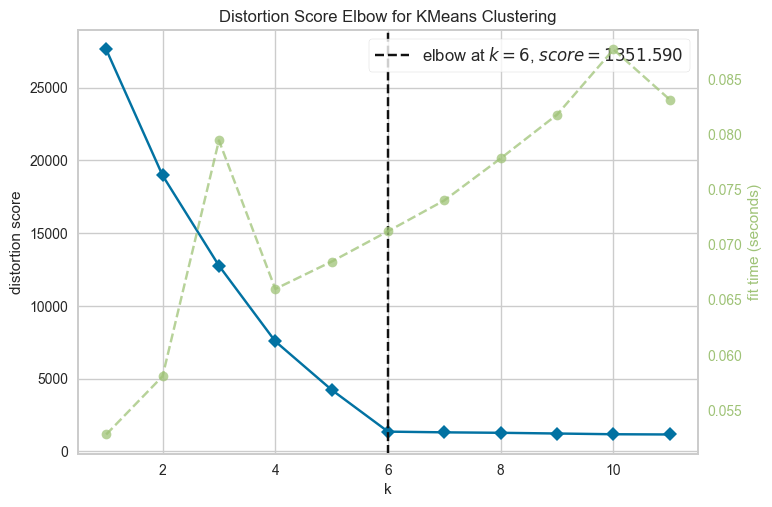

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [189]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state = 1, n_init = 10)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(task2)        
visualizer.show() 